<a href="https://colab.research.google.com/github/vickypandey07/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction_Vikram_Pandey_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**
---
###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

In [110]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Loading dataset and creating dataframe
df = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

# Firstly i do some Exploratory Data Analysis.

In [112]:
#Here checking the basic info about the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o



## .   It is found that, we have only 4 numerical columns and rest all columns are either categorical or they contains textual data in our dataset,.
## .   Out of 4 numerical columns, 1 is target variable.

# .Threrfore, we need to create some numerical columns from columns of object dtype.



In [113]:
 #first 10 rows of dataset using head()
 df.head(10)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
5,49,Behind the design of Seattle's library,Joshua Prince-Ramus,{0: 'Joshua Prince-Ramus'},{0: ['architect']},{0: 'Joshua Prince-Ramus is best known as arch...,1208138,2006-02-23,2006-07-10,TED2006,en,"['ar', 'bg', 'en', 'es', 'fr', 'he', 'it', 'ja...",48.0,1198,"['architecture', 'collaboration', 'culture', '...",{750: 'Building a theater that remakes itself'...,https://www.ted.com/talks/joshua_prince_ramus_...,Architect Joshua Prince-Ramus takes the audien...,I'm going to present three projects in rapid f...
6,86,Letting go of God,Julia Sweeney,{0: 'Julia Sweeney'},"{0: ['actor', 'comedian', 'playwright']}",{0: 'Julia Sweeney creates comedic works that ...,4636596,2006-02-24,2006-07-10,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",980.0,992,"['Christianity', 'God', 'atheism', 'comedy', '...","{22: 'Why people believe weird things', 94: ""L...",https://www.ted.com/talks/julia_sweeney_lettin...,When two young Mormon missionaries knock on Ju...,"On September 10, the morning of my seventh bir..."
7,94,Let's teach religion -- all religion -- in sch...,Dan Dennett,{0: 'Dan Dennett'},"{0: ['philosopher', 'cognitive scientist']}",{0: 'Dan Dennett thinks that human consciousne...,3781244,2006-02-02,2006-07-18,TED2006,en,"['ar', 

In [114]:
#checking for the shape of dataset 
df.shape

(4005, 19)

In [115]:
#checking the Null Values in dataset
df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

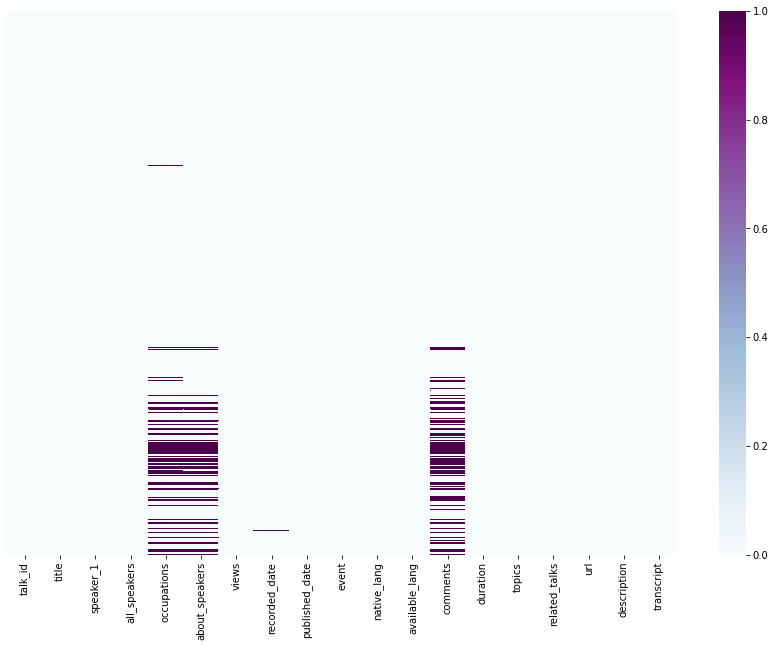

In [116]:
# Using heatmap to check missing data in dataset.

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [117]:
# Now dropping url column as it is of no use.

df = df.drop(columns=['url'])

#Checking for duplicated rows.

In [118]:
df.duplicated().sum()

0

## As dataset does not contain any duplicate rows,That's good

## Removing all_speakers, occupations, about_speakers,native_lang  columns from our dataset as they are not so important.

In [119]:
df = df.drop(['all_speakers', 'about_speakers','occupations','native_lang'], axis=1)

In [120]:
# Now Checking total null values once again.

df.isna().sum()

talk_id             0
title               0
speaker_1           0
views               0
recorded_date       1
published_date      0
event               0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

# **Let's do some EDA on columns**

#Let's explore speaker_1 column

**Speaker of top 10 most watched video**

In [121]:
#Extarcting the records of top 10 most viewed videos
df_pop=df.nlargest(10, ['views'])
df_pop[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


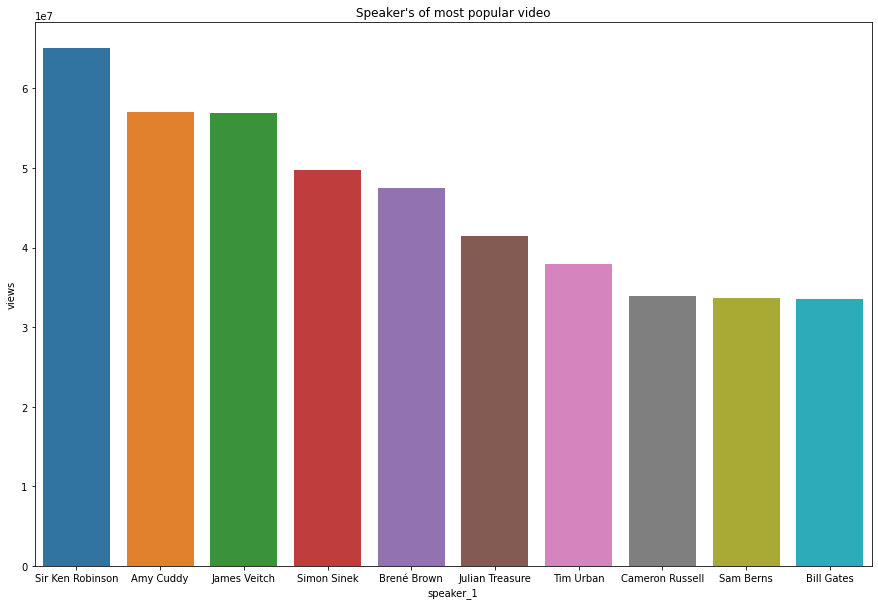

In [122]:
#top 10 most popular vidoes bar plot
plt.figure(figsize=(15,10))
plt.title("Speaker's of most popular video")
sns.barplot(x='speaker_1',y='views',data=df_pop)

* **Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk video.**


##**Let's explore the event column**

**Checking the most frequent event category**

In [123]:
#let's find the most frequent event categories
freq_event=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(5,['views'])
freq_event.reset_index(inplace=True)
freq_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84


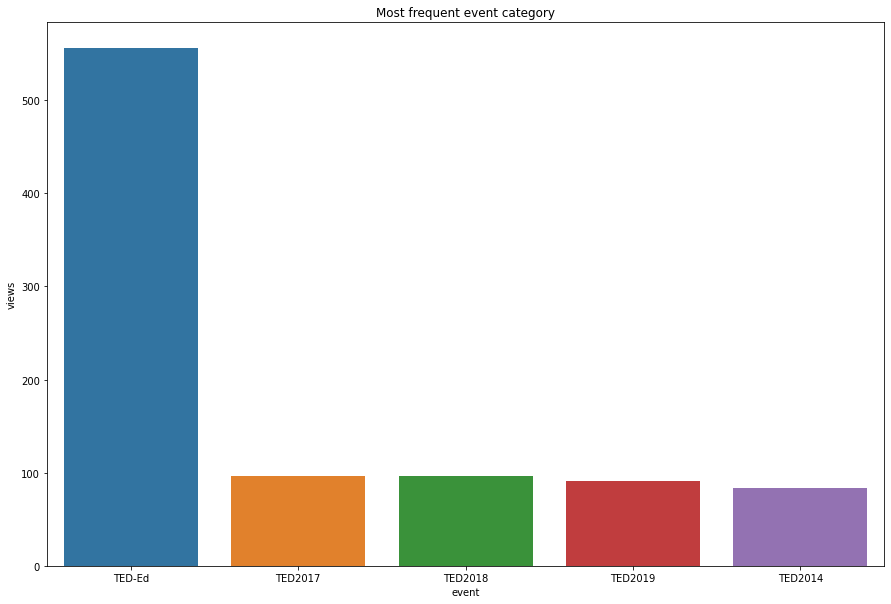

In [124]:
#Bar plot to show top 5 most frequent event category
plt.figure(figsize=(15,10))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event)

* **most frequent event category is TED-Ed**

#**Let's find most frequent words in title column.**

There are 157160 words in the combination of all titles.


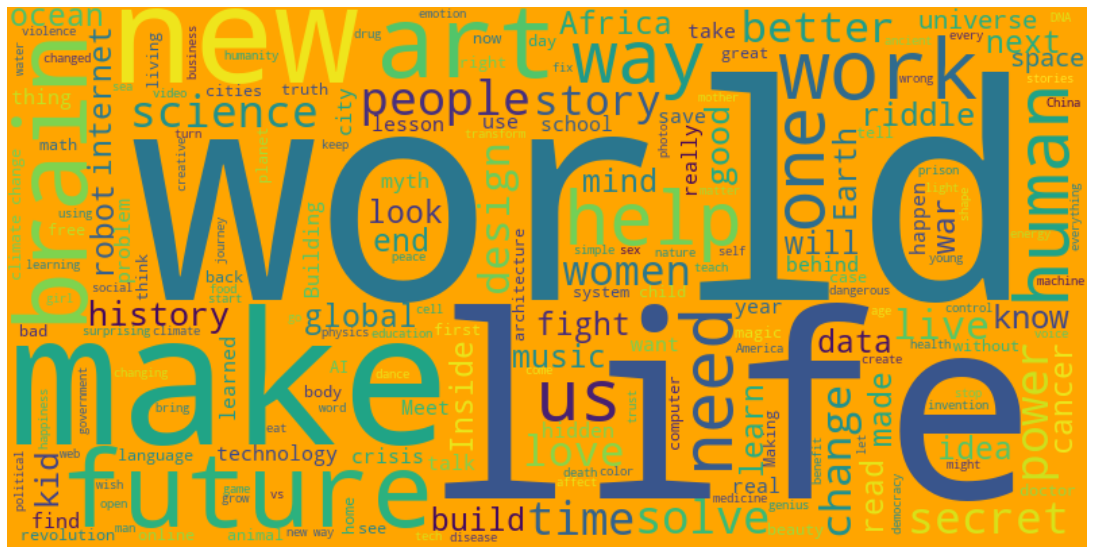

In [125]:
#ploting word cloud from title column
from wordcloud import WordCloud,ImageColorGenerator
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="orange", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **Most of Titles contains words like life, world, future, art.** 

##**Exploring published_date column**

In [126]:
# Importing datetime library

import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [127]:
df['published_date']

0      2006-06-27
1      2006-06-27
2      2006-06-27
3      2006-06-27
4      2006-06-27
          ...    
4000   2020-04-27
4001   2020-04-27
4002   2020-04-28
4003   2020-04-30
4004   2020-04-30
Name: published_date, Length: 4005, dtype: datetime64[ns]

In [128]:
# Extracting publish day, month and year from the published_date column

df['publish_day'] = df['published_date'].apply(lambda x: x.weekday())
df['publish_month']=df['published_date'].apply(lambda x: x.month)
df['publish_year'] = df['published_date'].apply(lambda x: x.year)

## Here, extracting the  weekday, month and year and add three separate columns as:


*   publish_year
*   publish_month

*   publish_day





In [129]:
# Encoding of publish_day column with corresponding week day name

week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['publish_day']=df['publish_day'].map(week_day)

###**First explore publish_year column.**

In [130]:
#Here checking years having frequent release 
year_freq=df[['publish_year','views']].groupby('publish_year').agg({'views' : 'count'})
year_freq=year_freq.sort_values('views',ascending=False)
year_freq.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent publish years')

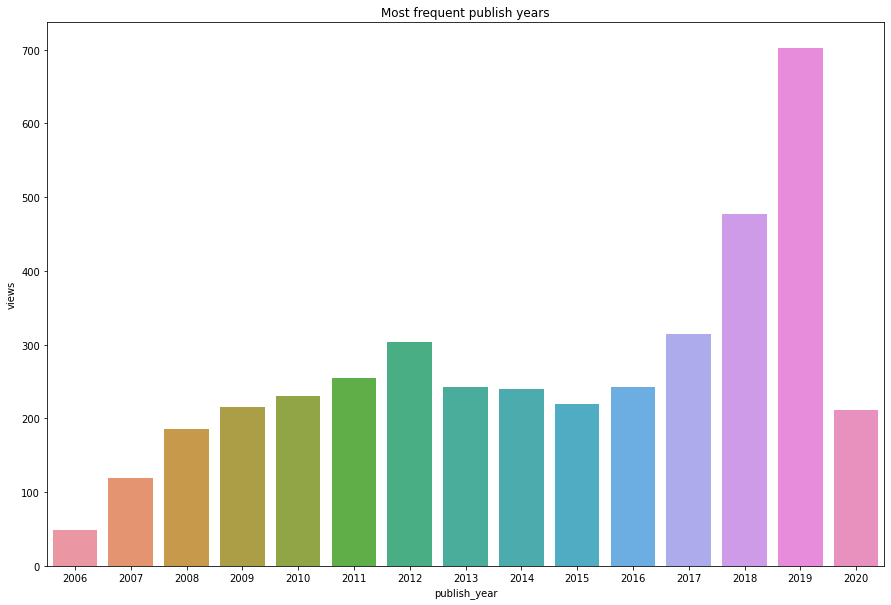

In [131]:
#Plotting the years having frequent release 
plt.figure(figsize=(15,10))
sns.barplot(x='publish_year',y='views',data=year_freq)
plt.title('Most frequent publish years')

* **In 2019 most of the videos has been published**

###**Now let's explore publish_month column**

In [132]:
# Encoding of publish_month column with corresponding month name
dict_month={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['publish_month']=df['publish_month'].map(dict_month)

In [133]:

# Checking for the most popular publish month according to average Views
pop_month=df[['publish_month','views']].groupby('publish_month').agg({'views' : 'mean'})
pop_month=pop_month.sort_values('views',ascending=False)
pop_month.reset_index(inplace=True)



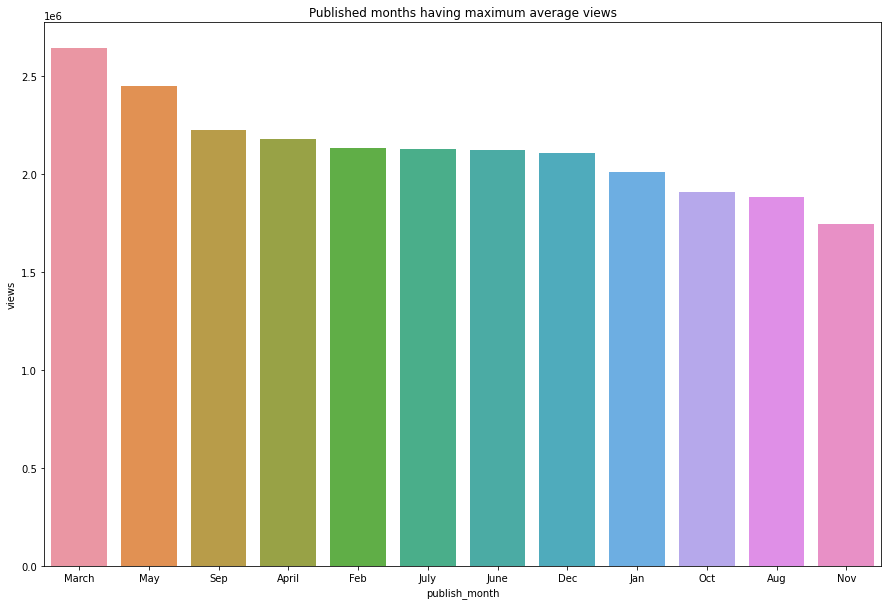

In [134]:
# Barplot showing months having maximum average views
plt.figure(figsize=(15,10))
plt.title('Published months having maximum average views')
sns.barplot(x='publish_month',y='views',data=pop_month)

* **Most popular videos are released in March**  

###**Exploring publish_day column.**

**Fisrtly checking for the most frequent publish day of the week.**

In [135]:
# Checking the day of the month having maximum publish date 
day_freq=df[['publish_day','views']].groupby('publish_day').agg({'views' : 'count'})
day_freq=day_freq.sort_values('views',ascending=False)
day_freq.reset_index(inplace=True)
day_freq

,publish_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent publish days')

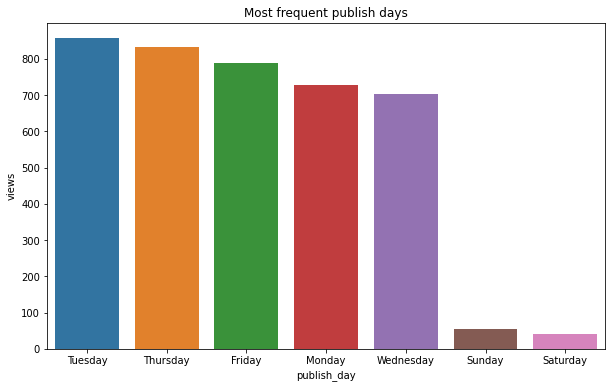

In [136]:
# Checking the day of the week having maximum publish date 
plt.figure(figsize=(10,6))
sns.barplot(x='publish_day',y='views',data=day_freq)
plt.title('Most frequent publish days')

* **Most videos are published on Tuesday followed by Thursday.**

##**Exploring some numerical features.**

Skewness: 8.185744
Kurtosis: 98.737918


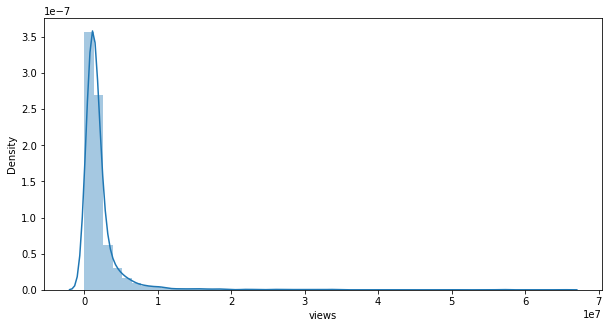

In [137]:
# Distplot to show distribution of views column

plt.figure(figsize=(10,5))
sns.distplot(df['views'])
print("Skewness: %f" % df['views'].skew())
print("Kurtosis: %f" % df['views'].kurt())

Skewness: 1.185608
Kurtosis: 6.849223


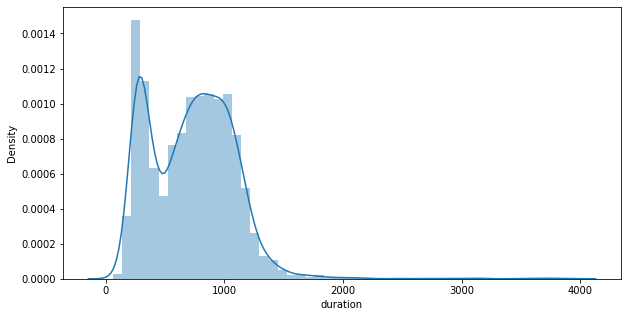

In [138]:
# Distplot to show distribution of duration column.

plt.figure(figsize=(10,5))
sns.distplot(df['duration'])
print("Skewness: %f" % df['duration'].skew())
print("Kurtosis: %f" % df['duration'].kurt())

#**Feature Enginnering on some columns.**

###**Speaker_1 column**

In [139]:
# let's crate new column speaker_1_avg_views.

pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

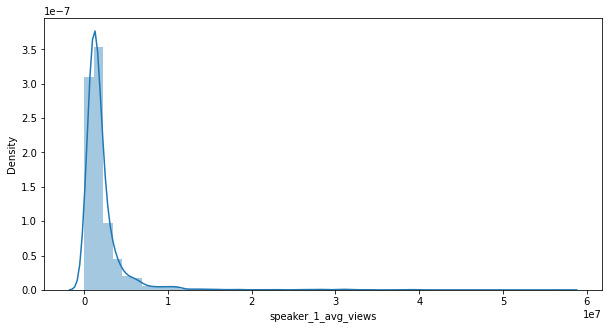

In [140]:
# Distribution of speaker_1_avg_views column

plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

###**Now let's do Feature Engineering on topics column**

In [141]:
# checking for what topics column contains

df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

* **The topics column contains the list of topic tags associated with each video.**

In [142]:
# Applying Eval funcion on topics column

df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

In [143]:
# Creating a new feature num_of_tags

df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

**Feature num_of_tags contains total number of topics for a particular video.**

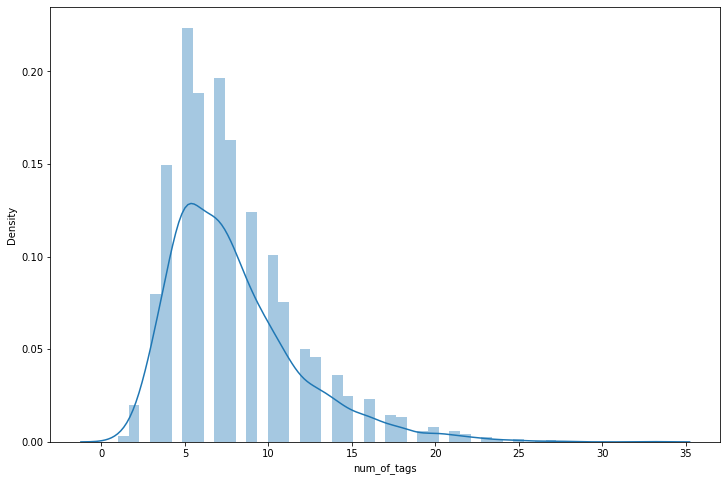

In [144]:
# Distplot to show distribution of num_of_tags feature

plt.figure(figsize=(12,8))
sns.distplot(df['num_of_tags'])

In [145]:
# Extracting the unique topics from topics list of each talk

unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

In [146]:
# Extracting the avg views with respect to each topic in another dict unique_topics_avg_view_dict

unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Storing the avg views with respect to topic for each talk

topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

In [147]:
# Printing topic wise average views feature

df['topics_wise_avg_views']

0       1750846
1       2290338
2       1915719
3       1642100
4       2904226
         ...   
4000    2134416
4001    2343639
4002    1805407
4003    1978146
4004    1877477
Name: topics_wise_avg_views, Length: 4005, dtype: int64

###**let's do Feature Engineering on related_talks column.**

In [148]:
# applying eval function on related_talks column

df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [149]:
# Let's see first row of related_talks column

df['related_talks'][0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 2339: "Climate change is happening. Here's how we adapt",
 29968: 'The most important thing you can do to fight climate change: talk about it',
 54715: 'How we can turn the tide on climate'}

* **Here Related_talks column contains a dictionary with talk_id as key and video title as it's value.**


In [150]:
# Creating a new feature called related_views

df['related_views'] = 0

In [151]:
# let's Extract the value of related_talks

for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

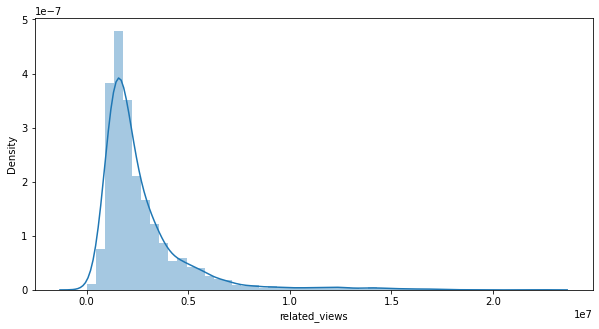

In [152]:
# Distplot to show the distribution of related_views column

plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

* **Related_views column is skewed normal distribution.**

###**Feature Engineering on event column**

**let's combine the event column as it contains lots of similar values.**

In [153]:
# Printing unique event categories.

event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

In [154]:
# Creating new column called event category
df['event_category'] = 'Other'
# categorising each record into the new event_category column according to their event
for i in range(len(df)):
    if df['event'][i][0:5]=='TED20':
        df['event_category'][i] = 'TED2000s'
    elif df['event'][i][0:6]=='TED-Ed':
        df['event_category'][i] = 'TED-Ed'
    elif df['event'][i][0:5]=='TED19':
        df['event_category'][i] = 'TED1900s'
    elif df['event'][i][0:4]=='TEDx':
        df['event_category'][i] = "TEDx"
    elif df['event'][i][0:7]=='TED@BCG':
        df['event_category'][i] = 'TED@BCG'
    elif df['event'][i][0:4]=='TED@':
        df['event_category'][i] = "TED@"
    elif df['event'][i][0:8]=='TEDSalon':
        df['event_category'][i] = "TEDSalon"
    elif df['event'][i][0:9]=='TEDGlobal':
        df['event_category'][i] = 'TEDGlobal'
    elif df['event'][i][0:8]=='TEDWomen':
        df['event_category'][i] = 'TEDWomen'
    elif df['event'][i][0:6]=='TEDMED':
        df['event_category'][i] = 'TEDMED'
    elif df['event'][i][0:3]=='TED':
        df['event_category'][i] = 'TEDOther'

In [155]:
# Value counts of event_category

df.event_category.value_counts()

TED2000s     1178
TEDx          696
TED-Ed        561
TEDGlobal     516
TEDOther      349
TEDWomen      194
Other         144
TED@          128
TEDMED         92
TEDSalon       79
TED@BCG        59
TED1900s        9
Name: event_category, dtype: int64

* **it is clear that there are 12 unique values in the event_category column.**

* **Now, drop the event column.**

In [156]:
# Dropping event column

df=df.drop(columns='event')

###**Let's do some Feature Engineering on published_date column.**

In [157]:
#creating video_age column which is the difference of current year and published year.**
df['video_age']=2021-df['publish_year']

In [158]:
# Now, drop published_date column

df=df.drop(columns='published_date')

###**Feature Engineering on available_lang column**

In [159]:
# Eval function applying on available_lang column

df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [160]:
# Now creating a new feature num_of_lang

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

In [161]:
# Dropping the available_lang column

df.drop(columns='available_lang',inplace=True)

**Here i have droped available_lang column**

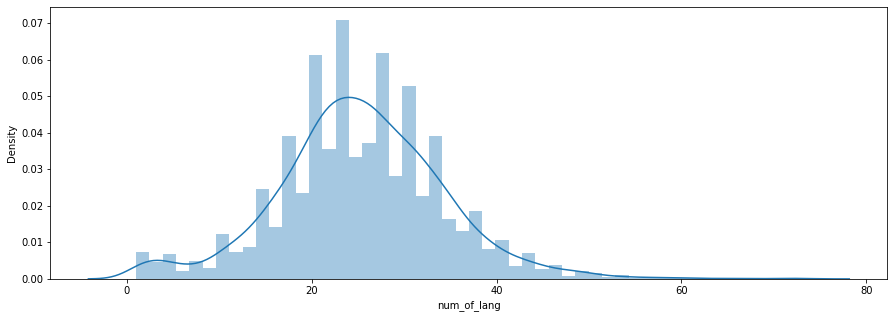

In [162]:
# Distplot to show distribution of num_of_lang column

sns.distplot(df['num_of_lang'])

#**Data Cleaning.**

##**let's Impute nan values of numerical columns using KNNImputer**

In [163]:
# Importing KNNImputer library to impute nan values

from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['comments']])
df[['comments']] = imputer.transform(df[['comments']])

In [164]:
# Here is try to see if there are any nan values in duration and comments column

df[['comments']].isna().sum()

comments    0
dtype: int64

## we have removed all null values from our numercal columns, that's good.

##**Let's check for outliers.**

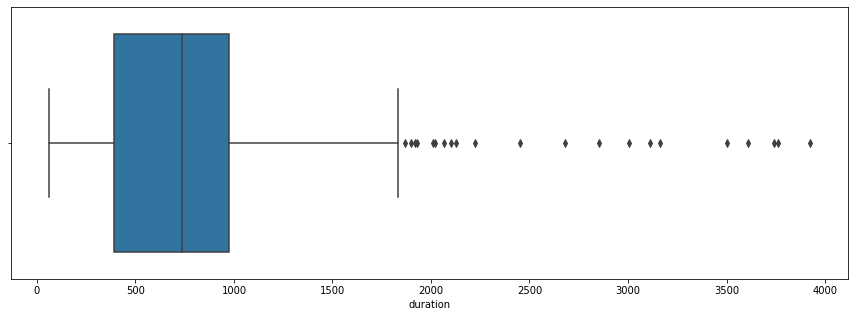

In [165]:
# Plotting boxplot for duration column

sns.boxplot(x=df['duration'])

##**Let's remove Outliers from our numerical columns.**

In [166]:
# checking the outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 361
description                0
duration                  21
event_category             0
num_of_lang              121
num_of_tags              116
publish_day                0
publish_month              0
publish_year               0
recorded_date              0
related_talks              0
related_views            300
speaker_1                  0
speaker_1_avg_views      373
talk_id                  119
title                      0
topics                     0
topics_wise_avg_views    242
transcript                 0
video_age                  0
views                    393
dtype: int64

* **As there are outliers in few columns therefore let's replace the outliers with the extreme values.**

In [167]:
# Replacing outliers with extreme values

for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','talk_id']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [168]:
# Let's check the outliers again

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 0
description              0
duration                 0
event_category           0
num_of_lang              0
num_of_tags              0
publish_day              0
publish_month            0
publish_year             0
recorded_date            0
related_talks            0
related_views            0
speaker_1                0
speaker_1_avg_views      0
talk_id                  0
title                    0
topics                   0
topics_wise_avg_views    0
transcript               0
video_age                0
views                    0
dtype: int64

* **no outliers left now**

#**Feature Selection**

ValueError: ignored

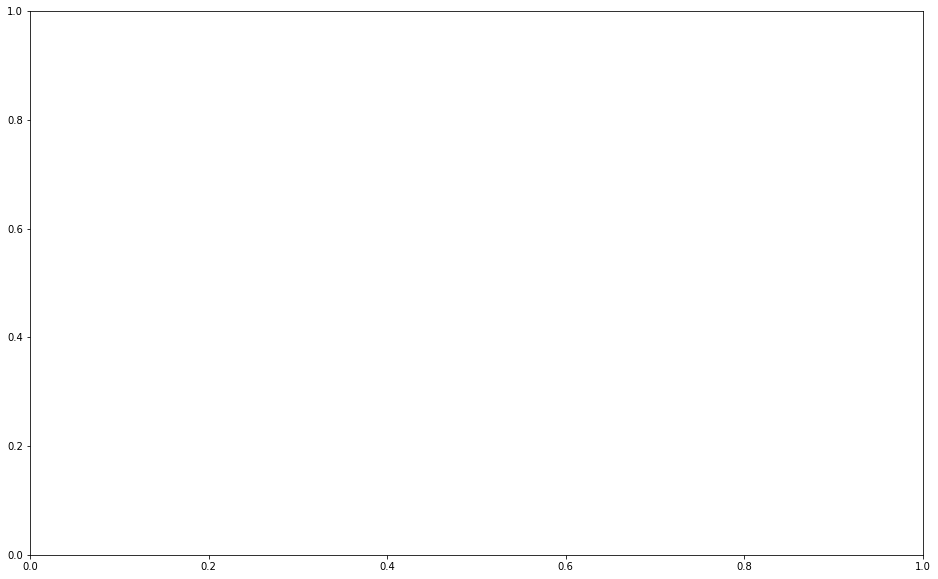

In [169]:
# let's draw a Correlation matrix between numerical features.

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='greens')

**Let's take important features from our dataframe.**

In [ ]:
# Creating new dataframe of selected features

df_new=df[['views','comments','duration','num_of_lang','num_of_tags','publish_day','publish_month','video_age',
        'related_views','event_category','speaker_1_avg_views','topics_wise_avg_views']]

In [ ]:
# Printing shape of df_new

df_new.shape

In [ ]:
# Now creating final dataframe for our prediction models.

final_df=pd.get_dummies(df_new)
final_df.shape

* **There are around 40 features after one hot encoding.**


##**Let's do Feature selection on the basis of p-value.**

In [ ]:
# Importing feature selection library

from sklearn.feature_selection import f_regression

**let's first Separate independent and dependent features.**

In [ ]:
# Separating independent and dependent features.

X=final_df.drop(columns=['views'])
y=final_df['views']

In [ ]:
# Here Printing f_scores for independent features.

f_scores = f_regression(X, y)
f_scores

In [ ]:
# Let's plot p-valuesfor numerical features.

plt.rcParams['figure.figsize'] = (20, 5)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue')
plt.title('P-value scores for numerical features')

In [ ]:
# List of important features.

imp_feat=['comments', 'duration', 'num_of_lang', 'num_of_tags',
       'related_views','publish_day_Friday','speaker_1_avg_views','topics_wise_avg_views',]

In [ ]:
# Creating dataframe with selected important features.

df_imp = final_df[imp_feat]

##**Applying train test split**

In [ ]:
# Importing library train_test_split

from sklearn.model_selection import train_test_split
X=df_imp
y=df['views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121212)

###**Let's do Data Scaling**

---



In [ ]:
# Importing StandardScaler from sklearn library

from sklearn.preprocessing import StandardScaler

# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**we need to build a baseline model and then we can improve from there.**

##**Linear regression model.**

In [ ]:
# Importing library

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Fitting the data

lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Predicting the values for test set

y_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [ ]:
# Calculating MSE and RMSE for test data set

from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE is" ,RMSE)

In [ ]:
# Printing MAE for training and test set.

print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

* **we find that our features are not following linear relationship but still this model is giving a satisfactory score.**

**So, let's improve the results of our baseline model.**

##**Random Forest Regressor**

In [ ]:
# Importing libraries.

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from mlxtend.regressor import StackingCVRegressor

In [ ]:
# let's do the Fitting of the data

rf = RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=200, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

* **By the following we find that, it's not a good score but we can improve by doing some hyperparameter tuning.**

**Hyperparameter Tuning using Randomized Search CV**

In [ ]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [30,50,80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100,150,200,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50,60,80]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the random forest regressor
rf_model = RandomForestRegressor()

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)
rf_random.fit(X_train,y_train)

In [ ]:
# Let's see which set of hyperparameters are optimal.

rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

**Best hyperparameters for our model.**

In [ ]:
# Now, calculating MAE for training and test set.

y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# Importing r2_score
from sklearn.metrics import r2_score

# Calculating R-squared value.

y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

**Therefore, according to r2_score value our model performed very well.**

**Here we plot the feature importance score with respect to the
 RF model**

In [ ]:
# Barplot to show important feature in RF model for prediction.

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

##**XGboost regressor**

In [ ]:
# Importing library

from xgboost import XGBRegressor

In [ ]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.05)

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

In [ ]:
# Let's see which set of hyperparameters are optimal

xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

In [ ]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

In [ ]:
# Let's calculating MAE for training and test set.

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

**plotting the feature importance score w.r.t. XGBregressor model**

In [ ]:
# Barplot to show important features.

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

##**ExtraTrees Regressor.**

In [ ]:
# Importing library.

from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Creating an instance of the Extratrees regressor
et_model = ExtraTreesRegressor()

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

In [ ]:
# Let's see optimal set of hyperparameters for this model.

et_optimal_model = et_random.best_estimator_
et_optimal_model

In [ ]:
# Calculating MAE for training and test set

y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

In [ ]:
# Making predictions for test data and also calculating r2_score

y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

**Here i am plotting the feature importance score with respect to ExtraTreesRegressor model**

In [ ]:
# Barplot to show important features w.r.t. ExtraTreesRegressor model

importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.show()

* **In all the models speaker_1_avg_views is impacting the much.**

##**Follwoing are the ML regressor models used here :**
* Random Forest Regressor
* Extra Tree Regressor
* Lasso Regressor
* Ridge Regressor
* KNearestNeighbors Regressor
* XGB Regressor

* **Now let's try all these models together and store the scores in a new dataframe.**

In [171]:
# Importing necessary libraries

from sklearn.linear_model import Ridge,Lasso
from sklearn import neighbors
import xgboost as xgb

In [172]:
# Instantiating all these models

models = [
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=15, max_features=5, n_estimators=120, min_samples_leaf=2, min_samples_split=2,
                           random_state=2019)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, random_state=2019, min_samples_leaf=2, min_samples_split=6)],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()] ,
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],  
           ['XGBRegressor: ', xgb.XGBRegressor()]         
         ]

In [178]:
# Fitting the models

data_model = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["Train_MAE"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["Test_MAE"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    data_model.append(curr_model_data)

[13:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [180]:
results_df=pd.DataFrame(data_model)
results_df


,Name,Train_MAE,Test_MAE,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,RandomForest,130447.825068,226668.513504,0.924229,0.819725,469500.641381
1,ExtraTreeRegressor :,123524.275098,208897.733010,0.902445,0.811990,479467.620923
2,Lasso:,261830.848221,275001.777385,0.817401,0.803998,489551.753404
3,Ridge:,261972.202752,275143.452084,0.817401,0.803991,489561.052185
4,KNeighborsRegressor:,281231.275687,351387.318851,0.847420,0.759885,541848.680409
5,XGBRegressor:,196118.924999,243267.693307,0.877453,0.814155,476699.445900


#**Conclusion**


* **RandomForest gets overfitted on default parameters.**
* **In all the features speaker_1_avg_views is most important.**
* **ExtraTreeRegressor is the best performer in terms of MAE while KNeighborsResgressor is the worst performer.**
* **Least viewed ted talks have words like war, Politics, worldcultures, goverment while the most viewed ted talks have words like psychology, work, technology, science, humour.**
* **Majority of best ted talks are single speaker talks.**
* **Month of publishing does not affect the popularity of talk.**